In [15]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

from gie import GosInE
from simulation_util import *

from load_data import *

In [41]:
def load_regrets(high, low, n = 20, k = 50, iters = 100, alpha = 1, root_dir="../data/alpha_100/alpha"):
    regrets = []
    t = 100000
    
    width_min  = 0
    width_step = 0.025
    width_max  = 0.4

    widths = [width_step * i for i in range(int((width_max - width_min) / width_step) + 1)]
    widths.pop(0)

    for delta in widths:
        for i in range(iters):
            ucb = pickle.load(open(f"{root_dir}/ucb_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))
            klucb = pickle.load(open(f"{root_dir}/klucb_{t}_{k}_{n}_{delta:.2f}_{high:.2f}_{low:.2f}_{alpha:.2f}_{i}.p", "rb"))

            regrets.append([delta, "UCB", ucb.average_regret()[-1]])
            regrets.append([delta, "KL-UCB", klucb.average_regret()[-1]])
        
    return regrets

In [2]:
def plot_results(delta, high, low, n, k, alpha = 1):
    # Load data
    (ucb_data, klucb_data) = load_data(delta=delta, high=high, low=low, alpha = 1, n = n, k = k, iters = 50, root_dir="../data/alpha_results")
    
    # Average Results
    ucb_avg_cum_reg = average_results([ucb.average_regret() for ucb in ucb_data])
    klucb_avg_cum_reg = average_results([klucb.average_regret() for klucb in klucb_data])
    
    # Plot Data
    plt.plot(ucb_avg_cum_reg, color="r", label="UCB")
    plt.plot(klucb_avg_cum_reg, color="g", label="KL-UCB")
    plt.xlabel("Time")
    plt.ylabel("Regret")
    plt.legend()
    plt.show()

In [40]:
def plot_deltas(n, k):
    
    
    regrets = load_regrets(0.9, 0.2, n = 20, k = 50, iters = 100, alpha = 1, root_dir="../data/delta_100/delta")
    
    

    df = pd.DataFrame(regrets, columns = ["Delta", "UCB-Type", "Regret"])
    #print(df)
    g = sns.lineplot(data = df, x = "Delta", y = "Regret", hue = "UCB-Type", markers = True, err_style="bars", ci = 95)
    g.legend_.set_title(None)
    g.set(xlabel=r"$\Delta_2$")
    ## Plot Data
    #plt.plot(deltas, ucb_regrets, "ro", color="r", label="UCB")
    #plt.plot(deltas, klucb_regrets, "ro", color="g", label="KL-UCB")
    #plt.xlabel(r"$\Delta_2$")
    #plt.ylabel("Regret")
    #plt.legend()
    #plt.show()

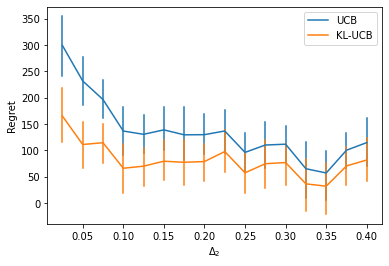

In [22]:
plot_deltas(5, 20)

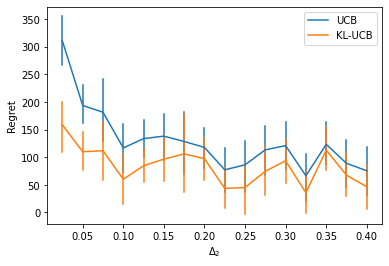

In [23]:
plot_deltas(10, 30)

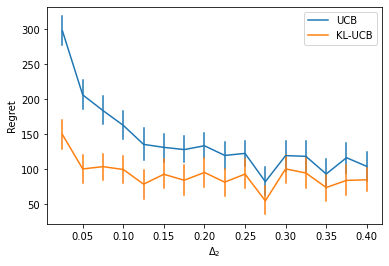

In [42]:
plot_deltas(20, 50)